<a href="https://colab.research.google.com/github/ertgrulyksk/Video-Game-Sales-Prediction-Model-with-Python/blob/main/Video_Game_Sales_Prediction_Model_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [8]:
data = pd.read_csv("vgsales.csv")
print(data.head())

                       Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating 

In [9]:
print(data.isnull().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [10]:
data = data.dropna()

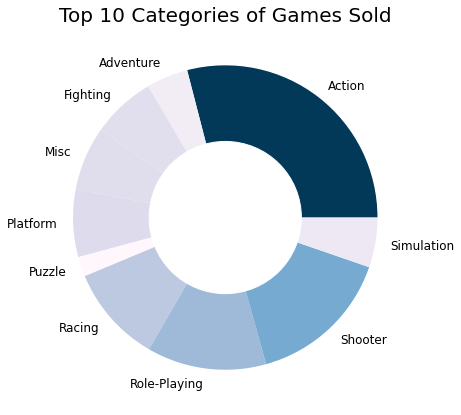

In [11]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

                 Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.016239  0.041346 -0.038443     0.042315   
NA_Sales               -0.016239  1.000000  0.841808  0.468607     0.726757   
EU_Sales                0.041346  0.841808  1.000000  0.519929     0.716330   
JP_Sales               -0.038443  0.468607  0.519929  1.000000     0.394823   
Other_Sales             0.042315  0.726757  0.716330  0.394823     1.000000   
Global_Sales            0.006661  0.955793  0.939313  0.613546     0.804028   
Critic_Score           -0.007661  0.233580  0.213102  0.147314     0.191509   
Critic_Count            0.203336  0.283917  0.265740  0.168299     0.239513   
User_Count              0.199348  0.246208  0.283504  0.072773     0.240085   

                 Global_Sales  Critic_Score  Critic_Count  User_Count  
Year_of_Release      0.006661     -0.007661      0.203336    0.199348  
NA_Sales             0.955793      0.233580      0.283917    0.24

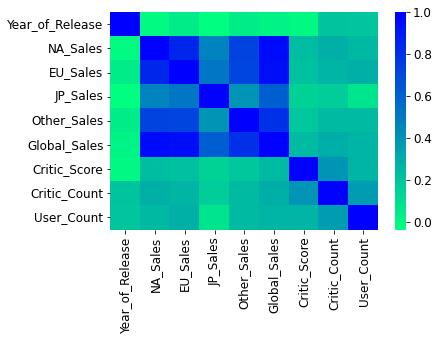

In [12]:
print(data.corr())
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

In [14]:
x = data[["Year_of_Release", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [16]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)